https://www.kaggle.com/shivamb/netflix-shows

TV Shows and Movies listed on Netflix

This dataset consists of tv shows and movies available on Netflix as of 2021. The dataset is collected from Flixable which is a third-party search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. It will be interesting to explore what all other insights can be obtained from the same dataset.

Inspiration
Some of the interesting questions (tasks) which can be performed on this dataset -

Understanding what content is available in different countries
Identifying similar content by matching text-based features
Network analysis of Actors / Directors and find interesting insights
Does Netflix has more focus on TV Shows than movies in recent years.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df=pd.read_csv('Datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape,df.columns

((8807, 12),
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
        'release_year', 'rating', 'duration', 'listed_in', 'description'],
       dtype='object'))

#### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


###### Checking null values/missing  values

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
## Checking how much of missing values 

null_values=df.isnull().sum()/len(df)
for i in range(len(null_values.index)):
    print('Column',null_values.index[i],'has',null_values[i]*100,'%null values\n')
    

Column show_id has 0.0 %null values

Column type has 0.0 %null values

Column title has 0.0 %null values

Column director has 29.908027705234474 %null values

Column cast has 9.367548540933349 %null values

Column country has 9.435676166685592 %null values

Column date_added has 0.11354604292040424 %null values

Column release_year has 0.0 %null values

Column rating has 0.04541841716816169 %null values

Column duration has 0.034063812876121265 %null values

Column listed_in has 0.0 %null values

Column description has 0.0 %null values



In [7]:
len(df['director'].unique()),len(df['cast'].unique()),len(df['country'].unique())

(4529, 7693, 749)

<AxesSubplot:>

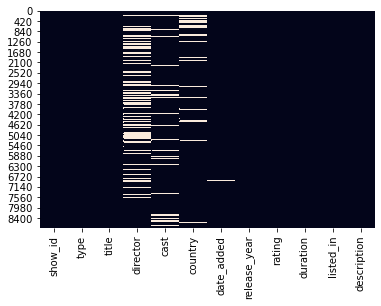

In [8]:
sns.heatmap(df.isnull(),cbar=False)

There is more missing values in columns director,cast,country

First drop director and cast missing values and fill minimal number ofmissing values in the remaining colums,using mode(most common value)and mean

#### Handling missing values

In [9]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['duration']=df['duration'].fillna(df['duration'].mode()[0])

df=df.dropna(how ="any",subset=['cast','director'])

<AxesSubplot:>

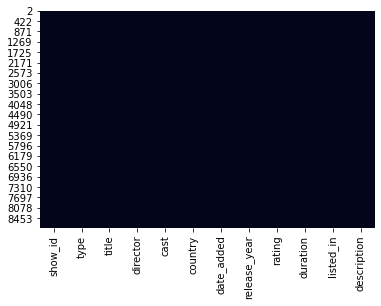

In [10]:
sns.heatmap(df.isnull(),cbar=False)

All the missing values in the datasets have either been removed or filled

#### checking duplicate values

In [11]:
df.duplicated().sum()

0

dataset has 0 duplicate values

#### cleaning data

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Feature engineering

Adding new columns

listed_in - Genre

year added-year_add

month added-month_add

country-country_main

In [13]:
df['listed_in']

2       Crime TV Shows, International TV Shows, TV Act...
5                      TV Dramas, TV Horror, TV Mysteries
6                                Children & Family Movies
7        Dramas, Independent Movies, International Movies
8                            British TV Shows, Reality TV
                              ...                        
8801              Dramas, International Movies, Thrillers
8802                       Cult Movies, Dramas, Thrillers
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 5700, dtype: object

In [14]:
# Rename listed_in as genre for easy understanding

df=df.rename(columns={'listed_in':"Genre"})
df['Genre']=df['Genre'].apply(lambda x: x.split(',')[0])
df['Genre'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genre, dtype: object

In [15]:
df['date_added'].unique()

array(['September 24, 2021', 'September 23, 2021', 'September 22, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [16]:
# add new column ..year added
df['year_add']=df['date_added'].apply(lambda x: x.split(' ')[-1])
df['year_add'].head()

2    2021
5    2021
6    2021
7    2021
8    2021
Name: year_add, dtype: object

In [17]:
## new column ..month added

df['month_add']=df['date_added'].apply(lambda x:x.split(' ')[0])
df['month_add'].head()

2    September
5    September
6    September
7    September
8    September
Name: month_add, dtype: object

In [18]:
df['country']

2                                           United States
5                                           United States
6                                           United States
7       United States, Ghana, Burkina Faso, United Kin...
8                                          United Kingdom
                              ...                        
8801                         United Arab Emirates, Jordan
8802                                        United States
8804                                        United States
8805                                        United States
8806                                                India
Name: country, Length: 5700, dtype: object

In [19]:
## new column..main country 

df['country_main']=df['country'].apply(lambda x: x.split(',')[0])
df['country_main'].head()

2     United States
5     United States
6     United States
7     United States
8    United Kingdom
Name: country_main, dtype: object

In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,September,United States
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,September,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,September,United Kingdom


In [21]:
df['type'].value_counts()

Movie      5522
TV Show     178
Name: type, dtype: int64

In [22]:
df['rating'].value_counts()

TV-MA       1940
TV-14       1329
R            789
PG-13        477
TV-PG        456
PG           279
TV-Y7        123
TV-Y         102
TV-G          96
NR            58
G             40
UR             3
TV-Y7-FV       3
NC-17          2
84 min         1
74 min         1
66 min         1
Name: rating, dtype: int64

Making two new dataframes,one with movies and other one with Tv shows

movie

tvshow

In [23]:
movie_data= df[df['type']=='Movie']
tv_data=df[df['type']=='TV Show']

In [24]:
movie_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,September,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...,2021,September,Germany
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,Children & Family Movies,When the clever but socially-awkward Tetê join...,2021,September,United States


In [25]:
tv_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,September,United States
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,September,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,September,United Kingdom
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,"September 23, 2021",2021,TV-MA,1 Season,Crime TV Shows,"Struggling to earn a living in Bangkok, a man ...",2021,September,United States
47,s48,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",United States,"September 16, 2021",2020,TV-MA,1 Season,International TV Shows,Five glamorous millennials strive for success ...,2021,September,United States


In [26]:
movie_data.shape,tv_data.shape

((5522, 15), (178, 15))

### Exploratory Data Analysis

##### >Number of movies and tv shows

<AxesSubplot:xlabel='type', ylabel='count'>

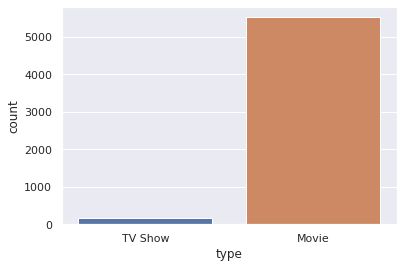

In [27]:
sns.set(style='darkgrid')
sns.countplot(x='type',data=df)

There are more Movies on Netflix than TvShows

#### >Rating Analysis 

<AxesSubplot:title={'center':'Highest Movie rating'}, xlabel='rating', ylabel='count'>

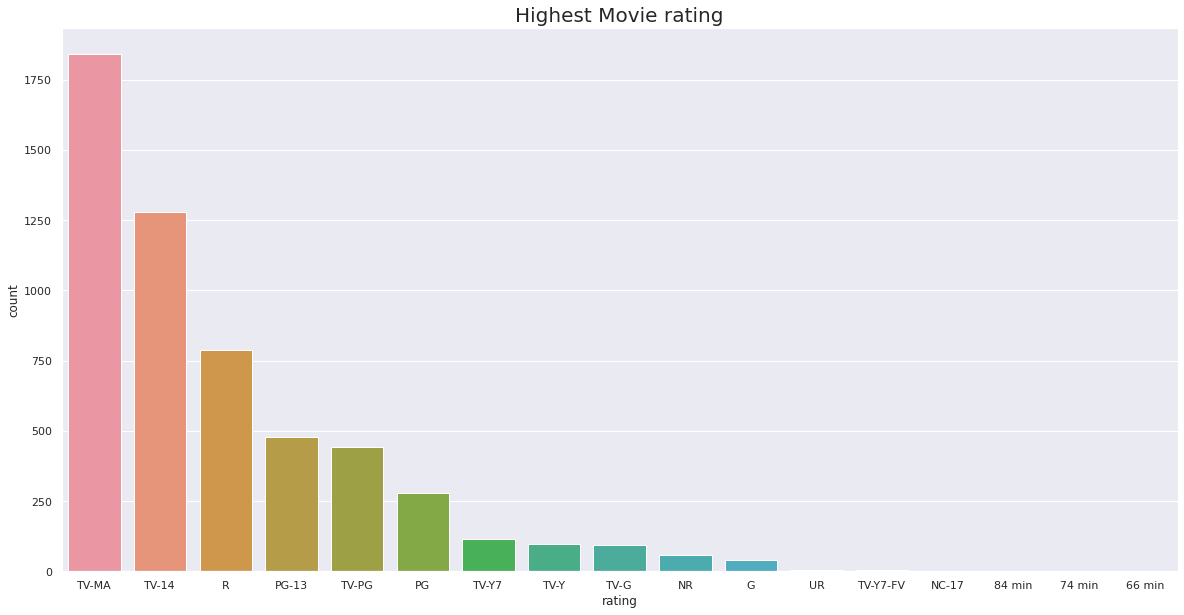

In [28]:
## Movie ratings

plt.figure(figsize=(20,10))
plt.title('Highest Movie rating',size=20)
sns.set(style='darkgrid')
sns.countplot(x='rating',data=movie_data,order=movie_data['rating'].value_counts().index[0:20])

Highest count of movies are made with the 'TV_MA' rating.ie,rating assigneed by TV parental Guidelines to a television pgm that was designed for only mature audiences.

Second highest count is the 'TV-14',for content may be appropriate for children younger than 14 yearsof age

Third highest count is the 'R' rating.content that only suitable for above 17 years of age



<AxesSubplot:title={'center':'Highest TV show ratings'}, xlabel='rating', ylabel='count'>

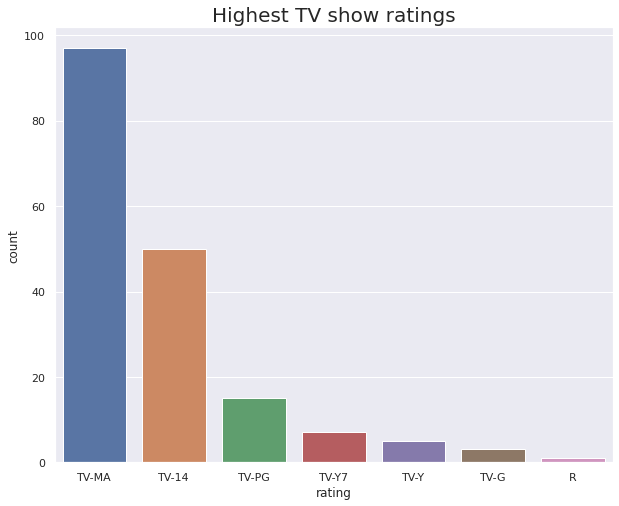

In [34]:
## TV shows rating

plt.figure(figsize=(10,8))
plt.title('Highest TV show ratings',size=20)
sns.set(style='darkgrid')
sns.countplot(x='rating',data=tv_data,order=tv_data['rating'].value_counts().index[0:20])


Highest count of Tv shows has 'TV-MA' ratings ,for which content only for mature audience 

Second highest count of ratingd is 'TV-14',for the content which has only appropriate for only younger than 14years of age

TV shows has very least number of counts with 'R ' rating

#### >Release year analysis 

<AxesSubplot:title={'center':'Release year Analysis of Content on Netflix'}, xlabel='count', ylabel='release_year'>

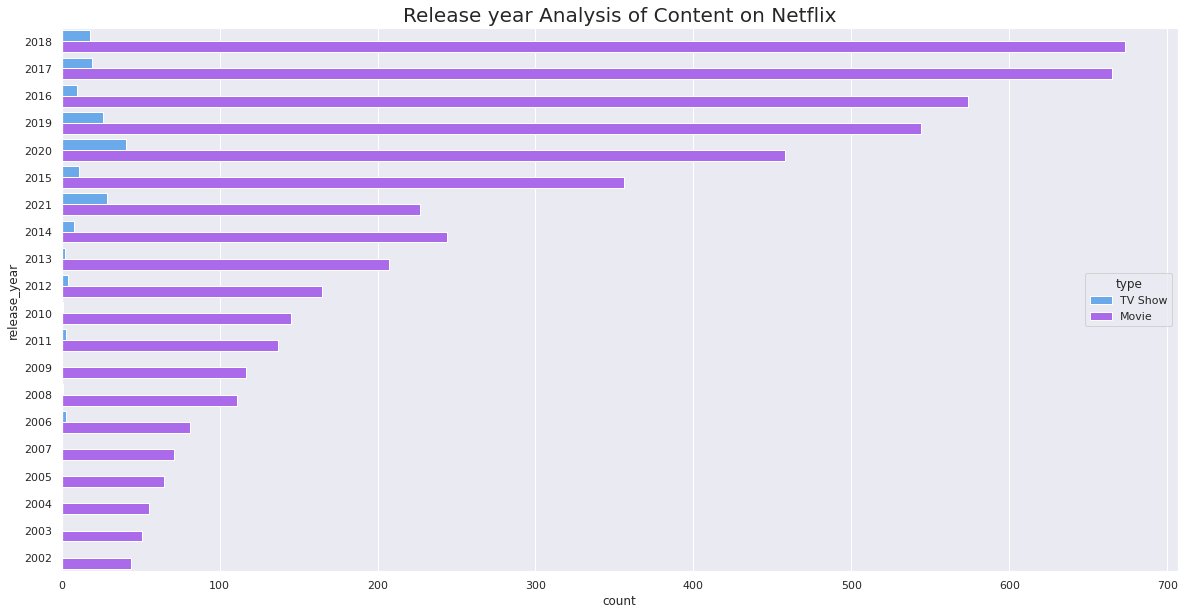

In [30]:
plt.figure(figsize=(20,10))
plt.title('Release year Analysis of Content on Netflix',size=20)
sns.set(style='darkgrid')
sns.countplot(y='release_year',data=df,palette='cool',order=df['release_year'].value_counts().index[0:20],hue=df['type'])

We can see that Netflix relesed most number of content in year 2018 

Noticable growth in releasing content can be seen from the year 2015

Most movies release on Netflix in the year 2018

Most Tvshow content release on Netflix in the year 2020

#### > content added Year Analysis

<AxesSubplot:title={'center':'Content Added on Netflix Analysis'}, xlabel='year_add', ylabel='count'>

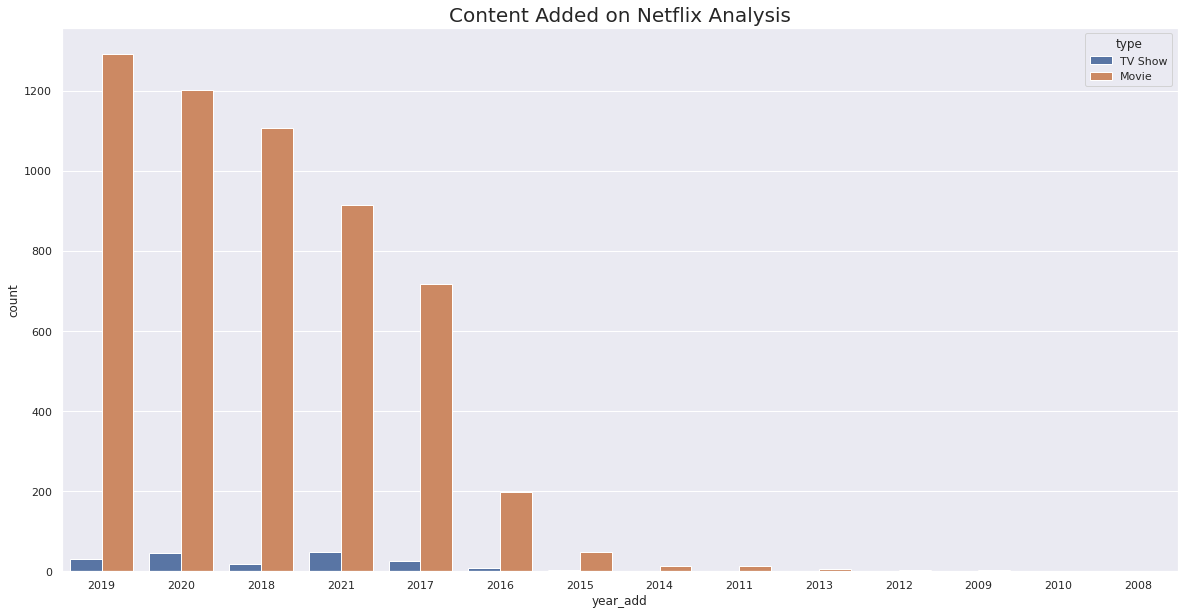

In [32]:
plt.figure(figsize=(20,10))
plt.title('Content Added on Netflix Analysis',size=20)
sns.set(style='darkgrid')
sns.countplot(x='year_add',data=df,order=df['year_add'].value_counts().index[0:15],hue=df['type'])

We can see that Netflix added more content in year 2019

Most movies added on Netflix in year 2019

Most TvShows added on Netflix in year 2020,2021